# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [140]:
# Import relevant libraries
import matplotlib.pyplot as plt
import pandas as pd

In [141]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns_ = ['id','terrestrial_date','sol','ls','month','min_temp','pressure']
weather_list_csv = pd.read_csv('/Users/t/Downloads/Mars News/Resources/Mars.csv')


In [142]:
# Confirm DataFrame was created successfully
weather_list_csv

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [143]:
# Examine data type of each column
weather_list_csv.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [144]:
# Change data types for data analysis
weather_list_csv['terrestrial_date'] = pd.to_datetime([x for x in weather_list_csv['terrestrial_date'].squeeze().tolist()])
weather_list_csv[['sol','ls','month']] = weather_list_csv[['sol','ls','month']].astype('int64')
weather_list_csv[['min_temp','pressure']] = weather_list_csv[['min_temp','pressure']].astype('float64')
weather_list_csv[['id']] = weather_list_csv[['id']].astype('object')


In [145]:
# Confirm type changes were successful by examining data types again
weather_list_csv.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [146]:
# 1. How many months are there on Mars?
months_on_mars = weather_list_csv.groupby('month')['month'].count()
months_on_mars

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [156]:
# 2. How many Martian days' worth of data are there?
len(weather_list_csv)

1867

In [173]:
# 3. What is the average low temperature by month?
avg_low_temp = weather_list_csv.groupby('month')['min_temp'].mean()
avg_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

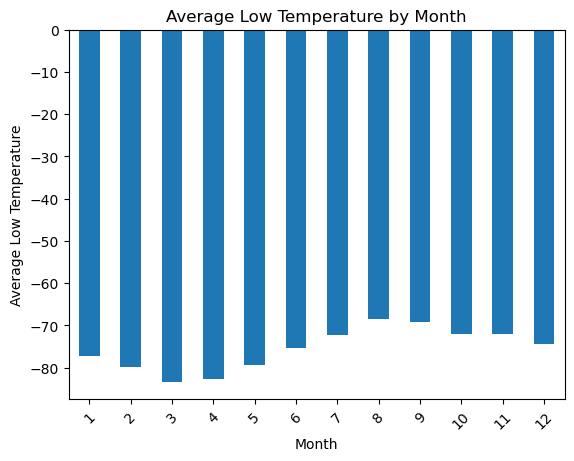

In [205]:
# Plot the average temperature by month
avg_low_temp.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature')
plt.title('Average Low Temperature by Month')
plt.xticks(rotation=45)
plt.show()


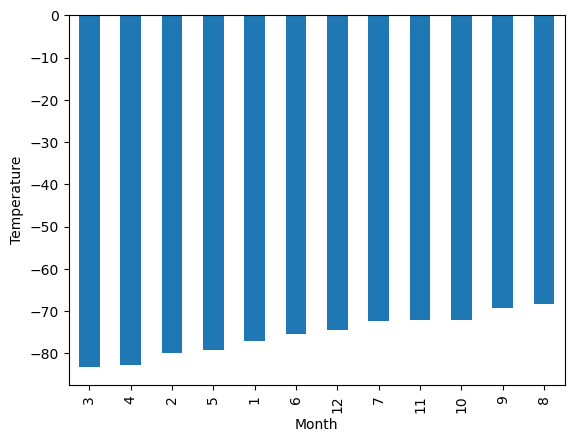

<Figure size 640x480 with 0 Axes>

In [244]:
# Identify the coldest and hottest months in Curiosity's location
temp_per_month = avg_low_temp.sort_values(ascending=True)
avg_temp = temp_per_month.plot(kind='bar')
avg_temp.set_xlabel("Month")
avg_temp.set_ylabel("Temperature")
plt.show()
plt.tight_layout()

In [245]:
# 4. Average pressure by Martian month
avg_pressure = weather_list_csv.groupby('month')['pressure'].mean()
avg_pressure


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

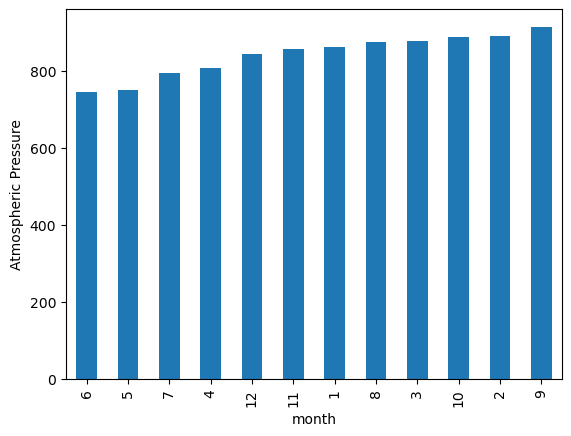

<Figure size 640x480 with 0 Axes>

In [259]:
# Plot the average pressure by month
avg_pressure_month = avg_pressure.sort_values(ascending=True)
avg_pressures = avg_pressure_month.plot(kind='bar')
avg_pressures.set_xlabel("Month")
avg_pressures.set_ylabel("Atmospheric Pressure")
plt.show()
plt.tight_layout()


In [266]:
# 5. How many terrestrial (earth) days are there in a Martian year?
terrestrial_days = weather_list_csv[['terrestrial_date', 'min_temp']].copy()
terrestrial_days

,terrestrial_date,min_temp
0,2012-08-16,-75.0
1,2012-08-17,-76.0
2,2012-08-18,-76.0
3,2012-08-19,-74.0
4,2012-08-20,-74.0
...,...,...
1862,2018-02-23,-78.0
1863,2018-02-24,-77.0
1864,2018-02-25,-76.0
1865,2018-02-26,-77.0


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [269]:
# Write the data to a CSV
weather_list_csv.to_csv('weather_list_data.csv', index=False)